# How to pay for a war: part 2

### An application of Markov jump linear quadratic dynamic programming

#### By [Sebastian Graves](https://github.com/sebgraves) and [Thomas J. Sargent](http://www.tomsargent.com/)

---

This notebook is a [sequel to an earlier notebook](https://github.com/QuantEcon/TaxSmoothing/blob/master/Tax_Smoothing_1.ipynb).

We use Markov jump linear quadratic (LQ) dynamic programming problems to implement some suggestions by Barro (1999, 2003) for extending his classic  1979 model of tax smoothing.

Barro's 1979  model is about a government that borrows and lends in order to help it minimize an intertemporal measure of  distortions caused by taxes. Technically, Barro's 1979 model looks a lot like a consumption smoothing model.  Our generalizations of his 1979 model will also look like a souped up consumption smoothing model.

Tractability induced Barro in 1979 to assume that 

   *  the government trades only one-period risk-free debt,  and 
   
   *  the one-period risk-free interest rate is constant. 
   
   
In our [earlier notebook](https://github.com/QuantEcon/TaxSmoothing/blob/master/Tax_Smoothing_1.ipynb) we relaxed  the second of  these assumptions but not the first. In particular, we used *Markov jump linear quadratic dynamic programming* to allow the exogenous interest rate to vary over time.

In this notebook, we add a maturity composition decision to the government's problem by expanding the dimension of the state.


   
We assume 

  * that the government borrows or saves in the form of risk-free bonds of maturities $1, 2, \ldots , H$
  
  * that interest rates on those bonds are time-varying and in particular governed by a jointly stationary stochastic process.


######   Two example specifications

We'll describe two possible specifications.  

   * In one specification, each period the government issues zero coupon bonds of one- and two-period maturities and redeems them only when they mature. In this version, the maturity structure of government debt is partly inherited from the past at each date.
   
   * In the second specification, the government redesigns the maturity structure of the debt each period. 
   
   

## A model with two-period debt and no restructuring


Let $T_t$ denote tax collections, $\beta$ a discount factor, $b_{t,t+1}$ time $t+1$ goods that the government promises to pay at $t$, $b_{t,t+2}$ time
$t+2$ goods that the government promises to pay at time $t$, $G_t$ government purchases, $p_{t,t+1}$ the number of time $t$ goods received per time $t+1$ goods promised, and $p_{t,t+2}$ the number of time $t$ goods received per time
$t+2$ goods promised.

Evidently, $p_{t, t+1}, p_{t,t+2}$ are inversely
related to appropriate corresponding gross  interest rates on government debt.

In the spirit of Barro (1979), the stochastic  process of government expenditures is exogenous.  

Given initial conditions $b_{-2,0}, b_{-1,0}, z_0, i_0$, where $i_0$ is the initial Markov state,  the government chooses
a contingency plan for $\{b_{t, t+1}, b_{t,t+2}, T_t\}_{t=0}^\infty$ to maximize

$$ - E_0 \sum_{t=0}^\infty \beta^t \left[ T_t^2 + c_1( b_{t,t+1} - b_{t,t+2})^2 \right]$$

subject to the constraints

\begin{align*}
 T_t & = G_t + b_{t-2,t} + b_{t-1,t} - p_{t,t+2} b_{t,t+2} - p_{t,t+1} b_{t,t+1} \cr
   G_t &  = U_{g,t} z_t \cr
   z_{t+1} & = A_{22,t} z_t + C_{2,t} w_{t+1} \cr
   \begin{bmatrix}
    p_{t,t+1} \cr
    p_{t,t+2} \cr
    U_{g,t} \cr
    A_{22,t} \cr
    C_{2,t}
   \end{bmatrix} & \sim \textrm{functions of Markov state with transition matrix } \Pi \end{align*}

Here $w_{t+1} \sim {\cal N}(0,I)$ and $\Pi_{ij} $ is the probability that the Markov state
moves from state $i$ to state $j$ in one period.   The variables $T_t, b_{t, t+1}, b_{t,t+2}$ are *control* variables chosen at $t$, while the variables $b_{t-1,t}, b_{t-2,t}$ are endogenous state variables inherited from the past at time $t$ and $p_{t,t+1}, p_{t,t+2}$ are exogenous state variables at time $t$. 

The parameter $c_1$ imposes a penalty on the government's issuing different quantities of one and two-period debt. This penalty deters  the government from taking large "long-short" positions in debt of different maturities. An example below will show this in action.

As well as extending the model to allow for a maturity decision for government debt, we can also in principle allow the matrices  $U_{g,t}, A_{22,t}, C_{2,t}$ to depend on the Markov state.

### Mapping the two-period model  into an LQ Markov jump problem

First define

$$ \hat b_t = b_{t-1,t} + b_{t-2,t} ,$$

which is debt due at time $t$.  Then define the endogenous part of the state:

$$ \bar b_t = \begin{bmatrix}
  \hat b_t \cr
    b_{t-1,t+1}
 \end{bmatrix}
$$
 
 and the complete state
$$ x_t = \begin{bmatrix} \bar b_t \cr
         z_t
       \end{bmatrix} $$
       
and the control vector
$$ u_{t} =  \begin{bmatrix}
    b_{t,t+1} \cr
    b_{t,t+2}
   \end{bmatrix} $$
   
The endogenous part of state vector follows the law of motion:

$$ \begin{bmatrix}
    \hat b_{t+1} \cr
    b_{t,t+2}
   \end{bmatrix}
   =
   \begin{bmatrix}
    0 & 1 \cr
    0 & 0
   \end{bmatrix}
 \begin{bmatrix}
  \hat b_{t} \cr
  b_{t-1,t+1}
 \end{bmatrix}
+
  \begin{bmatrix}
   1 & 0 \cr
   0 & 1 \cr
  \end{bmatrix}
   \begin{bmatrix}
    b_{t,t+1} \cr
    b_{t,t+2}
   \end{bmatrix}
$$

or

$$ \bar b_{t+1} = A_{11} \bar b_t + B_1 u_t  $$

Define the following functions of the state

$$ G_t = S_{G,t} x_t, \quad \hat b_t = S_1 x_t    $$

and

$$ M_t  =  \begin{bmatrix} - p_{t,t+1} & - p_{t,t+2} \end{bmatrix}  $$

where $p_{t,t+1}$ is the discount on one period loans in the discrete Markov state at time $t$ and
$p_{t,t+2}$ is the discount on two period loans in the discrete Markov state

Define $$ S_t = S_{G,t} + S_1 .$$

Note that in discrete Markov state $i$

$$ T_t = M_t u_t + S_t x_t . $$

It follows that

$$ T_t^2 = x_t' S_t' S_t x_t + u_t' M_t' M_t u_t + 2 u_t' M_t' S_t x_t $$

or

$$  T_t^2 = x_t'R_t x_t + u_t' Q_t u_t + 2 u_t' W_t x_t $$

where

$$ R_t = S_t'S_t, \quad Q_t = M_t' M_t, \quad  W_t = M_t' S_t $$

Because the payoff function also includes the penalty parameter on issuing debt of different maturities, we have:

$$ T_t^2 + c_1( b_{t,t+1} - b_{t,t+2})^2 = x_t'R_t x_t + u_t' Q_t u_t + 2 u_t' W_t x_t +  c_1 u_t'Q^c u_t $$

where $Q^c = \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix} $. Therefore, the overall Q matrix for the Markov jump LQ problem is:

$$ Q_t^c = Q_t + c_1Q^c $$

The law of motion of the state in all discrete Markov states $i$ is

$$ x_{t+1} = A_t x_t +  B u_t +  C_t w_{t+1} $$

where

$$ A_t = \begin{bmatrix}  A_{11} & 0 \cr
                         0 & A_{22,t}
       \end{bmatrix}, \quad
        B = \begin{bmatrix}
                   B_1 \cr
                   0
                  \end{bmatrix}, \quad
         C_t = \begin{bmatrix} 0 \cr C_{2,t} \end{bmatrix}
$$

Thus, in this problem all the matrices apart from $B$ may depend on the Markov state at time $t$.

## Function to map two-period model into a Markov jump linear quadratic control problem
As shown in the [previous notebook](https://github.com/QuantEcon/TaxSmoothing/blob/master/Tax_Smoothing_1.ipynb), the LQ_Markov class can solve Markov jump LQ problems when given the $A,B,C,R,Q,W$ matrices for each state of the world. The below function maps the primitive matrices and parameters from the above two-period model into the matrices that the LQ_Markov class requires:

In [1]:
import quantecon as qe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def LQ_markov_mapping(A22,C2,Ug,p1,p2,c1=0):

    """
    Function which takes A22, C2, Ug, p_{t,t+1},p_{t,t+2} and penalty parameter c1, and returns the 
    required matrices for the LQ_Markov model: A,B,C,R,Q,W.
    This version uses the condensed version of the endogenous state.
    """
    
    # Make sure all matrices can be treated as 2D arrays #
    A22 = np.atleast_2d(A22)
    C2 = np.atleast_2d(C2)
    Ug = np.atleast_2d(Ug)
    p1 = np.atleast_2d(p1)
    p2 = np.atleast_2d(p2)
    
    # Find number of states (z) and shocks (w)
    nz, nw = C2.shape
    
    # Create A11, B1, S1, S2, Sg, S matrices
    A11 = np.zeros((2,2))
    A11[0,1]=1
    
    B1 = np.eye(2)
    
    S1 = np.hstack((np.eye(1),np.zeros((1,nz+1))))
    Sg = np.hstack((np.zeros((1,2)),Ug))
    S = S1 + Sg
    
    # Create M matrix
    M = np.hstack((-p1,-p2))
    
    # Create A,B,C matrices
    A_T = np.hstack((A11,np.zeros((2,nz))))
    A_B = np.hstack((np.zeros((nz,2)),A22))
    A = np.vstack((A_T,A_B))
    
    B = np.vstack((B1,np.zeros((nz,2))))
    
    C = np.vstack((np.zeros((2,nw)),C2))

    # Create Q^c matrix
    Qc = np.array([[1,-1],[-1,1]])
    
    # Create R,Q,W matrices
    
    R = S.T.dot(S)
    Q = M.T.dot(M) + c1*Qc
    W = M.T.dot(S)
    
    return A,B,C,R,Q,W

With the above function, we can proceed to solve the model in two steps:

1. Use **LQ_markov_mapping** to map $U_{g,t}, A_{22,t}, C_{2,t}, p_{t,t+1}, p_{t,t+2}$ into the $A,B,C,R,Q,W$ matrices for each of the n states of the world.

2. Use the **LQ_markov** class to solve the resulting n-state Markov jump LQ problem.

### Example showing the importance of the penalty on different issuance across maturities

To implement a simple example of the two-period model, we assume that $G_t$ follows an AR(1) process: 

$$ G_{t+1} = \bar G + \rho G_t + \sigma w_{t+1} $$

To do this, we set $z_t = \begin{bmatrix} 1 \\ G_t \end{bmatrix}$, and consequently:

$$ A_{22} = \begin{bmatrix} 1 & 0 \\ \bar G & \rho \end{bmatrix} \hspace{2mm} , \hspace{2mm} C_2 = \begin{bmatrix} 0 \\ \sigma \end{bmatrix} \hspace{2mm} , \hspace{2mm} U_g = \begin{bmatrix} 0 & 1 \end{bmatrix} $$

Therefore, in this example, $A_{22}, C_2$ and $U_g$ are not time-varying.

We will assume that there are two states of the world, one with a flatter yield curve, and one with a steeper yield curve. In state 1, prices are:

$$ p^1_{t,t+1} = \beta \hspace{2mm} , \hspace{2mm} p^1_{t,t+2} = \beta^2 - 0.02$$

and in state 2, prices are:

$$ p^2_{t,t+1} = \beta \hspace{2mm} , \hspace{2mm}  p^2_{t,t+2} = \beta^2 + 0.02$$

We first solve the model with no penalty parameter on different issuance across maturities, i.e. $c_1 = 0$. We also need to specify a transition matrix for the state of the world, we use:

$$ \Pi = \begin{bmatrix} 0.9 & 0.1 \\ 0.1 & 0.9 \end{bmatrix} $$

Thus, each Markov state  is persisent, and there is an equal chance of moving from one to the other.

(You should download [the file lq_markov.py](https://github.com/QuantEcon/TaxSmoothing/blob/master/lq_markov.py) and put it in the same directory as this notebook before you execute the next line.)

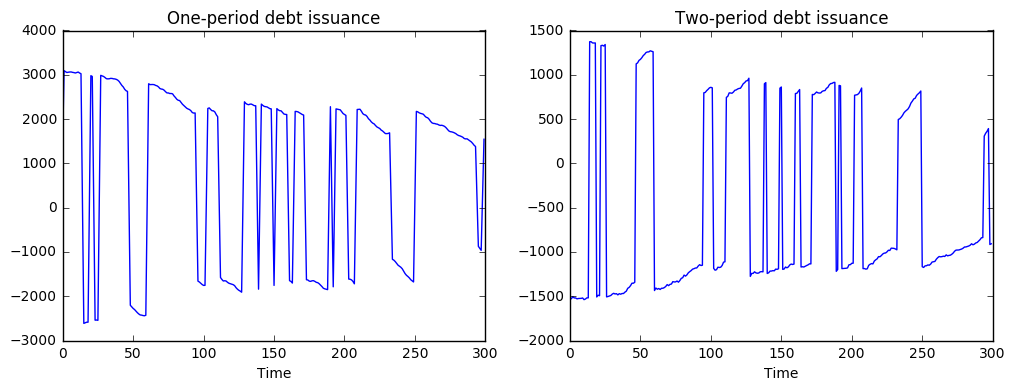

In [2]:
from lq_markov import LQ_Markov
from collections import namedtuple

# Create namedtuple to keep the R,Q,A,B,C,W matrices for each state of the world
world = namedtuple('world', ['A', 'B', 'C', 'R', 'Q', 'W'])

# Model parameters 
beta, Gbar, rho, sigma, c1 = 0.95, 5, 0.8, 1, 0
p1, p2, p3, p4 = beta, beta**2 - 0.02, beta, beta**2 + 0.02

# Basic model matrices
A22 = np.array([[1,0],[Gbar, rho],])
C_2 = np.array([[0], [sigma]])
Ug = np.array([[0,1]])

A1,B1,C1,R1,Q1,W1 = LQ_markov_mapping(A22,C_2,Ug,p1,p2,c1)
A2,B2,C2,R2,Q2,W2 = LQ_markov_mapping(A22,C_2,Ug,p3,p4,c1)

# Small penalties on debt required to implement no-ponzi scheme
R1[0,0] = R1[0,0] + 1e-9
R2[0,0] = R2[0,0] + 1e-9

#Sets up the two states of the world
v1 = world(A=A1,B=B1,C=C1,R=R1,Q=Q1,W=W1)
v2 = world(A=A2,B=B2,C=C2,R=R2,Q=Q2,W=W2)

Pi = np.array([[0.9,0.1],[0.1,0.9]])

# Solve the model using the LQ_Markov class
MJLQBarro = LQ_Markov(beta,Pi,v1,v2)

# Simulate the model
x0 = np.array([[100,50,1,10]])
x,u,w,t = MJLQBarro.compute_sequence(x0,ts_length=300)

#Plot of one and two-period debt issuance
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(u[0,:])
plt.title('One-period debt issuance')
plt.xlabel('Time')
plt.subplot(122)
plt.plot(u[1,:])
plt.title('Two-period debt issuance')
plt.xlabel('Time')

The above simulations show that when no penalty is imposed on different issuances across maturities, the government has an incentive to take large "long-short" positions in debt of different maturities. To prevent such an outcome, we now set $c_1 = 0.01$. This penalty is enough to ensure that the government issues positive quantities of both one and two-period debt:

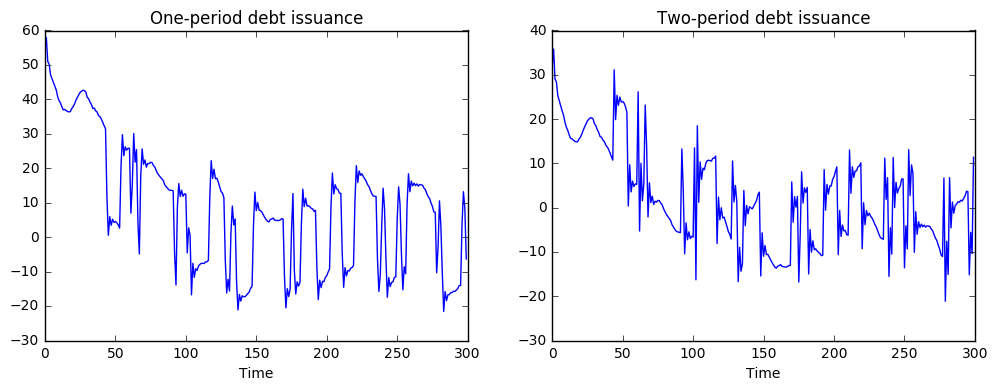

In [3]:
# Put small penalty on different issuance across maturities
c1 = 0.01

A1,B1,C1,R1,Q1,W1 = LQ_markov_mapping(A22,C_2,Ug,p1,p2,c1)
A2,B2,C2,R2,Q2,W2 = LQ_markov_mapping(A22,C_2,Ug,p3,p4,c1)

# Small penalties on debt required to implement no-ponzi scheme
R1[0,0] = R1[0,0] + 1e-9
R2[0,0] = R2[0,0] + 1e-9

#Sets up the two states of the world
v1 = world(A=A1,B=B1,C=C1,R=R1,Q=Q1,W=W1)
v2 = world(A=A2,B=B2,C=C2,R=R2,Q=Q2,W=W2)

# Solve the model using the LQ_Markov class
MJLQBarro2 = LQ_Markov(beta,Pi,v1,v2)

# Simulate the model
x,u,w,t = MJLQBarro2.compute_sequence(x0,ts_length=300)

#Plot of one and two-period debt issuance
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(u[0,:])
plt.title('One-period debt issuance')
plt.xlabel('Time')
plt.subplot(122)
plt.plot(u[1,:])
plt.title('Two-period debt issuance')
plt.xlabel('Time')

## A model with restructuring

This model alters two features of the previous model:

1. The maxium horizon of government debt is now extended to a general *H* periods.

2. The government is able to redesign the maturity structure of debt  every period.

We  impose a cost on adjusting issuance of each maturity by amending the payoff function to become:

$$ T_t^2 + \sum_{j=0}^{H-1} c_2 (b_{t+j}^{t-1} - b_{t+j+1}^t)^2 $$

The government's budget constraint  is now:

\begin{equation}
T_t + \sum_{j=1}^Hp_{t,t+j} b_{t+j}^t = b_t^{t-1} + \sum_{j=1}^{H-1} p_{t,t+j} b_{t+j}^{t-1} + G_t
\end{equation}

To map this into the Markov Jump LQ framework, we define state and control variables. 

Let:

$$ \bar b_t = \begin{bmatrix} b^{t-1}_t \\ b^{t-1}_{t+1} \\ \vdots \\  b^{t-1}_{t+H-1} \end{bmatrix} \hspace{2mm} , \hspace{2mm} u_t = \begin{bmatrix} b^{t}_{t+1} \\ b^{t}_{t+2} \\ \vdots \\  b^{t}_{t+H} \end{bmatrix}  $$

Thus, $\bar b_t$ is the endogenous state (debt issued last period) and $u_t$ is the control (debt issued today). As before, we will also have the exogenous state $z_t$, which determines government spending. Therefore, the full state is:

$$ x_t = \begin{bmatrix} \bar b_t \\ z_t \end{bmatrix} $$

We also define a vector $p_t$ that contains the time $t$ price of goods in period $t + j$:

$$p_t = \begin{bmatrix} p_{t,t+1} \\ p_{t,t+2} \\ \vdots \\  p_{t,t+H} \end{bmatrix}  $$

Finally, we define three useful matrices $S_s, S_x, \tilde S_x$:

$$ \begin{bmatrix} p_{t,t+1} \\ p_{t,t+2} \\ \vdots \\  p_{t,t+H-1} \end{bmatrix} = S_s p_t \text{ where } S_s = \begin{bmatrix} 1 & 0 & 0 & \cdots & 0 \\ 0 & 1 & 0 & \cdots & 0 \\ \vdots & & \ddots & & \\ 0 & 0 & \cdots & 1 & 0  \end{bmatrix} $$


$$ \begin{bmatrix} b^{t-1}_{t+1} \\ b^{t-1}_{t+2} \\ \vdots \\  b^{t-1}_{t+T-1} \end{bmatrix} = S_x \bar b_t  \text{ where } S_x = \begin{bmatrix} 0 & 1 & 0 & \cdots & 0 \\ 0 & 0 & 1 & \cdots & 0 \\ \vdots & &  & \ddots & \\ 0 & 0 & \cdots & 0 & 1  \end{bmatrix} $$

$$ b^{t-1}_t = \tilde S_x \bar b_t \text{ where } \tilde S_x = \begin{bmatrix} 1 & 0 & 0 & \cdots & 0 \end{bmatrix} $$

In terms of dimensions, the first two matrices defined above are $ (H-1) \times H$. The last is $1 \times H$. 

We can now write the government's budget constraint in matrix notation. Rearranging the government budget constraint gives:

$$ T_t = b_t^{t-1} + \sum_{j=1}^{H-1} p_{t+j}^t b_{t+j}^{t-1} + G_t - \sum_{j=1}^H p_{t+j}^t b_{t+j}^t  $$

or

\begin{equation}
T_t = \tilde S_x \bar b_t + (S_s p_t) \cdot (S_x \bar b_t) + U_g z_t - p_t \cdot u_t
\end{equation}

If we want to write this in terms of the full state, we have:

$$ T_t = \begin{bmatrix}  (\tilde S_x + p_t'S_s'S_x) & Ug \end{bmatrix} x_t - p_t' u_t $$

To simplify the notation, let $S_t = \begin{bmatrix}  (\tilde S_x + p_t'S_s'S_x) & Ug \end{bmatrix} $.

Then $$ T_t = S_t x_t - p_t' u_t$$

Therefore

$$ T_t^2 = x_t' R_t x_t + u_t ' Q_t u_t + 2 u_t'W_t x_t $$

where

$$ R_t = S_t'S_t , \hspace{5mm} Q_t = p_t p_t' , \hspace{5mm} W_t = -p_t S_t $$

Because the payoff function also includes the penalty parameter for rescheduling, we have:

$$ T_t^2 + \sum_{j=0}^{H-1} c_2 (b_{t+j}^{t-1} - b_{t+j+1}^t)^2 = T_t^2 + c_2(\bar b_t - u_t)'(\bar b_t - u_t)$$

Because the complete state is $x_t$ and not $\bar b_t$, we rewrite this as:

$$ T_t^2 + c_2(S_c x_t - u_t)'(S_c x_t - u_t) $$

where $S_c = \begin{bmatrix} I & 0 \end{bmatrix} $

Multiplying this out gives:

$$ T_t^2 + c_2 x_t' S_c' S_c x_t - 2c_2 u_t' S_c x_t + c_2 u_t'u_t $$

Therefore, with the cost term, we must amend our $R,Q,W$ matrices as follows:

$$ R^c_t = R_t + c_2 S_c'S_c $$
$$ Q^c_t = Q_t + c_2 I$$
$$ W^c_t = W_t - c_2 S_c $$

To finish mapping into the Markov jump LQ setup, we need to construct the law of motion for the full state. This is simpler than in the previous setup, as we now have $\bar b_{t+1} = u_t$. 

Therefore:

\begin{equation}
x_{t+1} \equiv \begin{bmatrix} \bar b_{t+1} \\ z_{t+1} \end{bmatrix} = A_t x_t + B u_t + C_t w_{t+1}
\end{equation}

where

$$ A_t = \begin{bmatrix} 0 & 0 \\ 0 & A_{22,t} \end{bmatrix} , \hspace{5mm} B = \begin{bmatrix} I \\ 0 \end{bmatrix} , \hspace{5mm} C = \begin{bmatrix} 0 \\ C_{2,t} \end{bmatrix} $$

This completes the mapping into a Markov jump LQ problem.

## Function to map model with restructuring into a Markov jump linear quadratic control problem

As with the previous model, we can use a function to map the primitives of the model with restructuring into the matrices that the LQ_Markov class requires:



In [4]:
def LQ_markov_mapping_restruct(A22,C2,Ug,T,p_t,c=0):

    """
    Function which takes A22, C2, T, p_t,c and returns the required matrices for the LQ_Markov model: A,B,C,R,Q,W
    Note, p_t should be a T by 1 matrix.
    c is the rescheduling cost (a scalar)
    This version uses the condensed version of the endogenous state.
    """
    
    # Make sure all matrices can be treated as 2D arrays == #
    A22 = np.atleast_2d(A22)
    C2 = np.atleast_2d(C2)
    Ug = np.atleast_2d(Ug)
    p_t = np.atleast_2d(p_t)
    
    # Find number of states (z) and shocks (w)
    nz, nw = C2.shape
    
    # Create Sx,tSx,Ss,S_t matrices (tSx stands for \tilde S_x)
    Ss = np.hstack((np.eye(T-1),np.zeros((T-1,1))))
    Sx = np.hstack((np.zeros((T-1,1)),np.eye(T-1)))
    tSx = np.zeros((1,T))
    tSx[0,0] = 1

    S_t = np.hstack((tSx + p_t.T.dot(Ss.T).dot(Sx), Ug))
    
    # Create A,B,C matrices
    A_T = np.hstack((np.zeros((T,T)),np.zeros((T,nz))))
    A_B = np.hstack((np.zeros((nz,T)),A22))
    A = np.vstack((A_T,A_B))
    
    B = np.vstack((np.eye(T),np.zeros((nz,T))))
    
    C = np.vstack((np.zeros((T,nw)),C2))

    # Create cost matrix Sc
    Sc = np.hstack((np.eye(T),np.zeros((T,nz))))
    
    # Create R_t,Q_t,W_t matrices
    
    R_c = S_t.T.dot(S_t) + c*Sc.T.dot(Sc)
    Q_c = p_t.dot(p_t.T) + c*np.eye(T)
    W_c = -p_t.dot(S_t) - c*Sc
    
    return A,B,C,R_c,Q_c,W_c

### Example model with restructuring

As an example for the model with restructuring, consider this model where $H = 3$.

We will assume that there are two states of the world, one with a flatter yield curve, and one with a steeper yield curve. In state 1, prices are:

$$ p^1_{t,t+1} = 0.9695 \hspace{2mm} , \hspace{2mm} p^1_{t,t+2} = 0.902 \hspace{2mm} , \hspace{2mm} p^1_{t,t+3} = 0.8369$$

and in state 2, prices are:

$$ p^2_{t,t+1} = 0.9295 \hspace{2mm} , \hspace{2mm} p^2_{t,t+2} = 0.902 \hspace{2mm} , \hspace{2mm} p^2_{t,t+3} = 0.8769$$

We will assume the same transition matrix  and $G_t$ process as above.

In [5]:
# New model parameters
H = 3
p1 = np.array([[0.9695],[0.902],[0.8369]])
p2 = np.array([[0.9295],[0.902],[0.8769]])
Pi = np.array([[0.9,0.1],[0.1,0.9]])

# Put penalty on different issuance across maturities
c2 = 0.5

A1,B1,C1,R1,Q1,W1 = LQ_markov_mapping_restruct(A22,C_2,Ug,H,p1,c2)
A2,B2,C2,R2,Q2,W2 = LQ_markov_mapping_restruct(A22,C_2,Ug,H,p2,c2)

# Small penalties on debt required to implement no-ponzi scheme
R1[0,0] = R1[0,0] + 1e-9
R1[1,1] = R1[1,1] + 1e-9
R1[2,2] = R1[2,2] + 1e-9
R2[0,0] = R2[0,0] + 1e-9
R2[1,1] = R2[1,1] + 1e-9
R2[2,2] = R2[2,2] + 1e-9

#Sets up the two states of the world
v1 = world(A=A1,B=B1,C=C1,R=R1,Q=Q1,W=W1)
v2 = world(A=A2,B=B2,C=C2,R=R2,Q=Q2,W=W2)

# Solve the model using the LQ_Markov class
MJLQBarro3 = LQ_Markov(beta,Pi,v1,v2)

x0 = np.array([[5000,5000,5000,1,10]])
x,u,w,t = MJLQBarro3.compute_sequence(x0,ts_length=300)

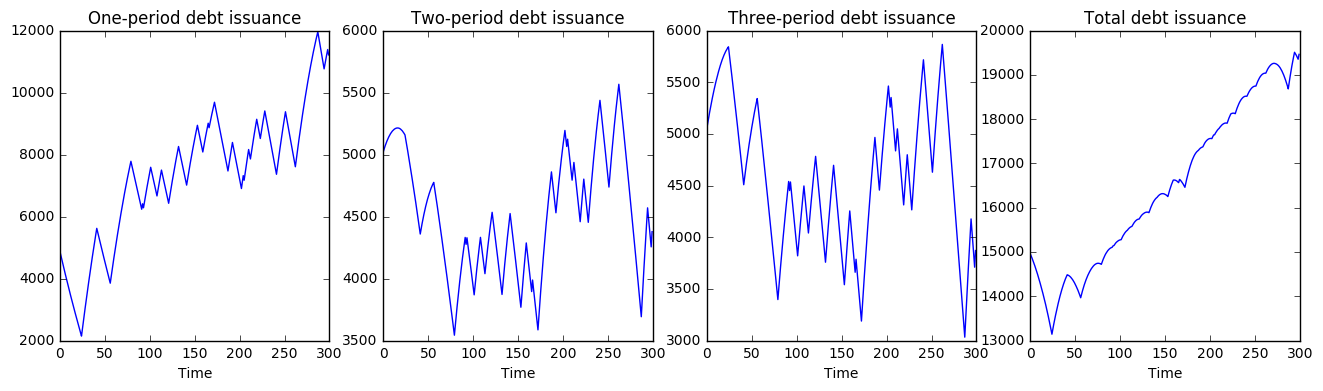

In [6]:
#Plots of different maturities debt issuance

plt.figure(figsize=(16,4))
plt.subplot(141)
plt.plot(u[0,:])
plt.title('One-period debt issuance')
plt.xlabel('Time')
plt.subplot(142)
plt.plot(u[1,:])
plt.title('Two-period debt issuance')
plt.xlabel('Time')
plt.subplot(143)
plt.plot(u[2,:])
plt.title('Three-period debt issuance')
plt.xlabel('Time')
plt.subplot(144)
plt.plot(u[0,:]+u[1,:]+u[2,:])
plt.title('Total debt issuance')
plt.xlabel('Time')

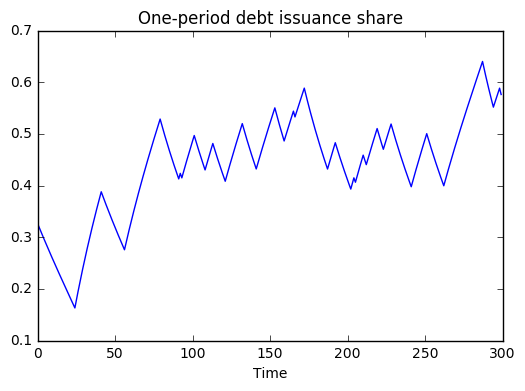

In [7]:
#Plot share of debt issuance which is short-term

plt.plot(u[0,:]/(u[0,:]+u[1,:]+u[2,:]))
plt.title('One-period debt issuance share')
plt.xlabel('Time')